# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.
Problem Statement:
Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

Problem Statement
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

You are provided with following 2 files:

1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.

2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.

 

Dataset Attributes
Here is the description of all the variables :

Variable: Definition
ID: Unique client ID
age: Age of the client
job: Type of job
marital: Marital status of the client
education: Education level
default: Credit in default.
housing: Housing loan
loan: Personal loan
contact: Type of communication
month: Contact month
day_of_week: Day of week of contact
duration: Contact duration
campaign: number of contacts performed during this campaign to the client
pdays: number of days that passed by after the client was last contacted
previous: number of contacts performed before this campaign
poutcome: outcome of the previous marketing campaign
Output variable (desired target):
Subscribed (target): has the client subscribed a term deposit? (YES/NO)

Datasets:

Downlaod Files:
https://github.com/dsrscientist/dataset5

https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv

https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from prettytable import PrettyTable
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve


import warnings
warnings.filterwarnings('ignore')

df_train=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv")
display(df_train.head())

df_test=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv")
display(df_test.head())

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [2]:
print('Shape of our train data {}'.format(df_train.shape))
print('Shape of given test data {}'.format(df_test.shape))


Shape of our train data (31647, 18)
Shape of given test data (13564, 17)


In [3]:
# Get the unique values of 'poutcome' column
print(df_train.poutcome.unique())

print(df_train.subscribed.unique())

['unknown' 'success' 'failure' 'other']
['no' 'yes']


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [5]:
df_train.describe(include='all')


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647,31647,31647,31647,31647.000000,31647,31647,31647,31647.000000,31647,31647.000000,31647.000000,31647.000000,31647.000000,31647,31647
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,6842,19095,16224,31062,NaN,17584,26516,20423,NaN,9669,NaN,NaN,NaN,NaN,25929,27932
mean,22563.972162,40.957247,NaN,NaN,NaN,NaN,1363.890258,NaN,NaN,NaN,15.835466,NaN,258.113534,2.765697,39.576042,0.574272,NaN,NaN
std,13075.936990,10.625134,NaN,NaN,NaN,NaN,3028.304293,NaN,NaN,NaN,8.337097,NaN,257.118973,3.113830,99.317592,2.422529,NaN,NaN
min,2.000000,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,11218.000000,33.000000,NaN,NaN,NaN,NaN,73.000000,NaN,NaN,NaN,8.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,22519.000000,39.000000,NaN,NaN,NaN,NaN,450.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,33879.500000,48.000000,NaN,NaN,NaN,NaN,1431.000000,NaN,NaN,NaN,21.000000,NaN,318.500000,3.000000,-1.000000,0.000000,NaN,NaN


Observation:

Data has null/nan/missing values.

In [6]:
#count missing values
df_train.isnull().sum()


ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [7]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical = [x for x in df_train.columns.to_list() if x not in categorical]
numerical.remove('subscribed')

print('Categorical features:', categorical)
print('Numerical features:', numerical)

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical features: ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


# Data Analysis(Uni Variate)

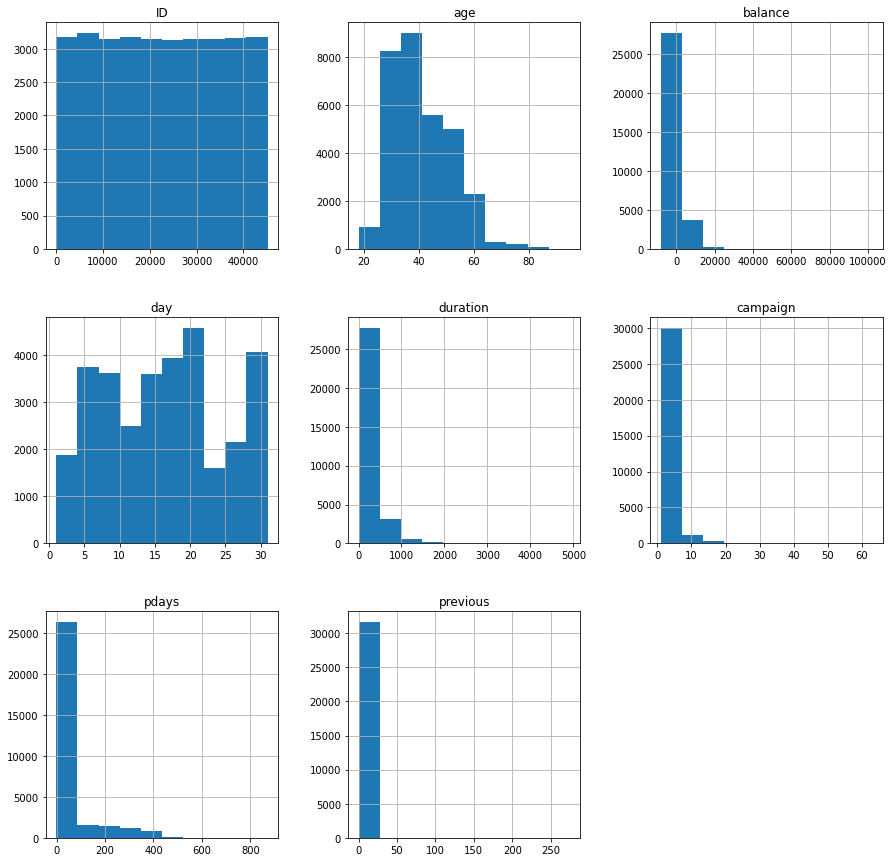

In [8]:
#Histogram grid
df_train[numerical].hist(figsize=(15,15))
plt.show()

Text(0.5, 0, 'Target class')

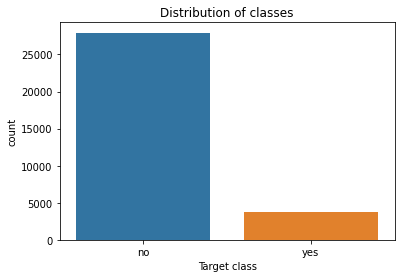

In [9]:
from matplotlib import pyplot as plt
sns.countplot(x=df_train['subscribed'])
plt.title('Distribution of classes')
plt.xlabel('Target class')

In [10]:
df_train.subscribed.value_counts()


no     27932
yes     3715
Name: subscribed, dtype: int64

Observation:

Our dataset is highly imbalanced.

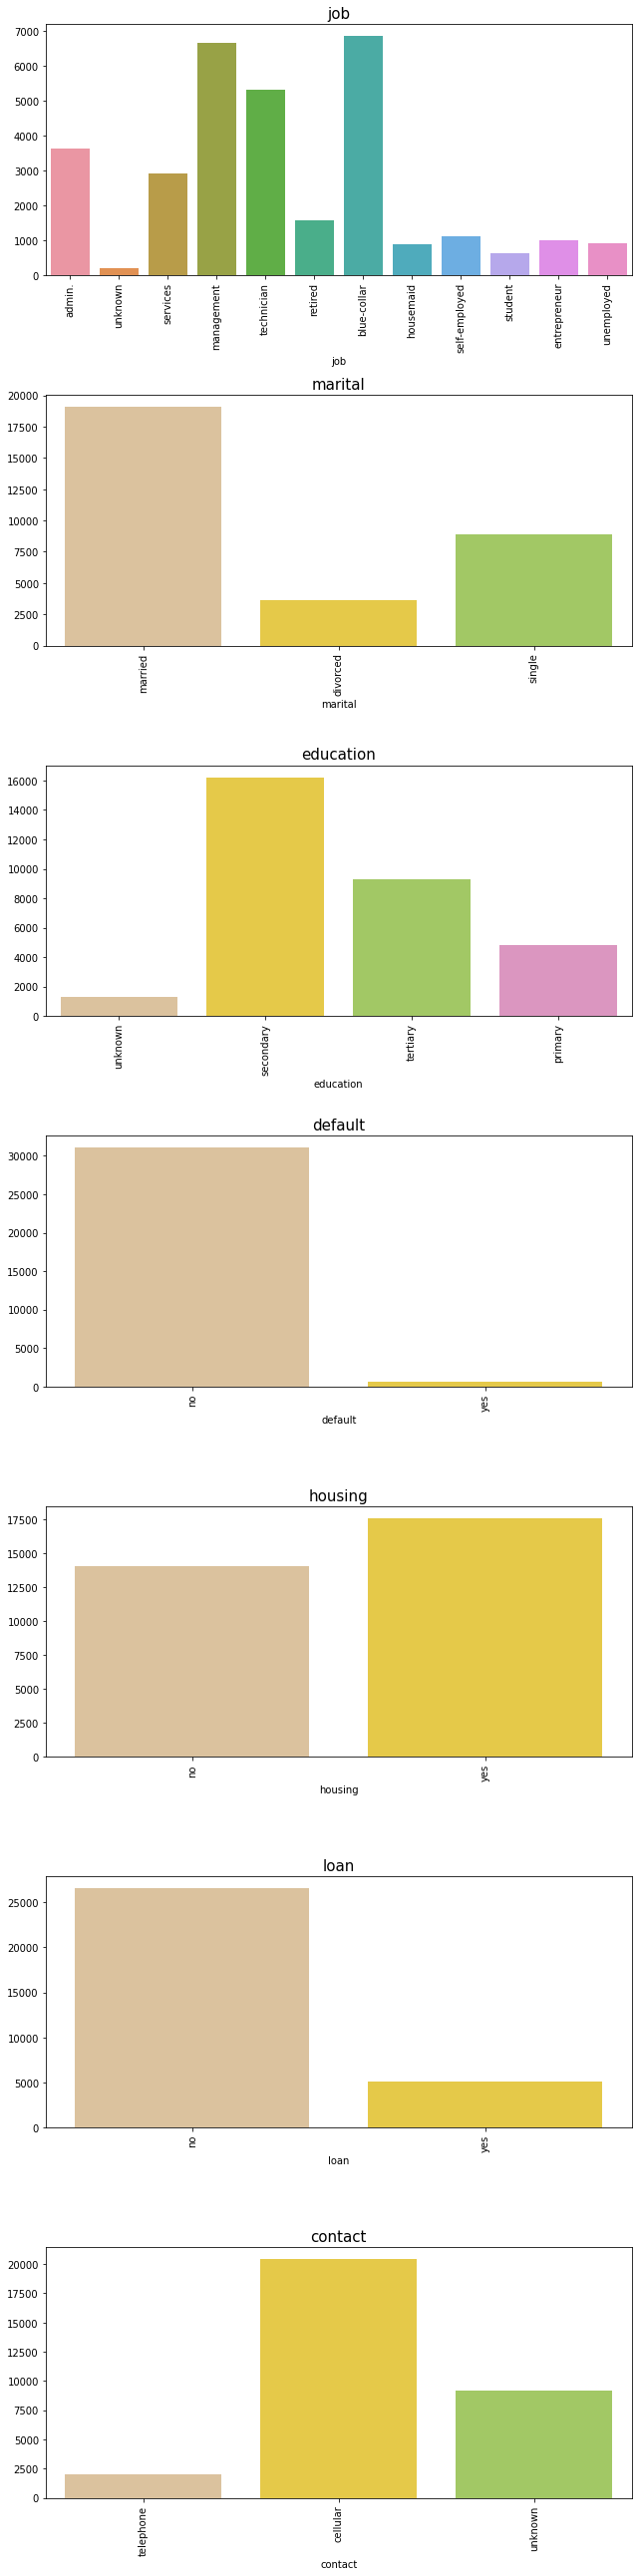

In [11]:
#Bar plots of categorical features
sns.set_palette('Set2_r')
plt.figure(figsize=(9,36), facecolor='white')
plotnumber =1
for i in categorical:
    if plotnumber <=7:
        ax = plt.subplot(7,1,plotnumber)
        sns.countplot(x=df_train[i])
        plt.title(i,fontsize=15)
        plt.xticks(rotation=90)
        plt.ylabel('')
    plotnumber+=1
plt.tight_layout()
plt.show()

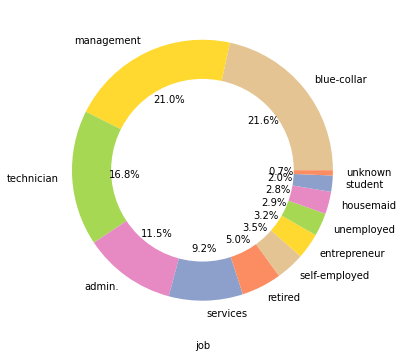

<Figure size 432x288 with 0 Axes>

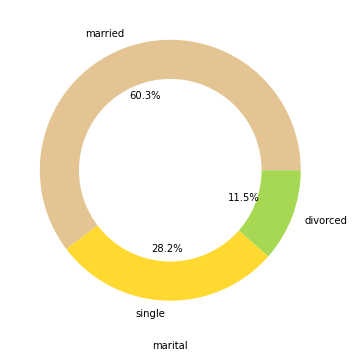

<Figure size 432x288 with 0 Axes>

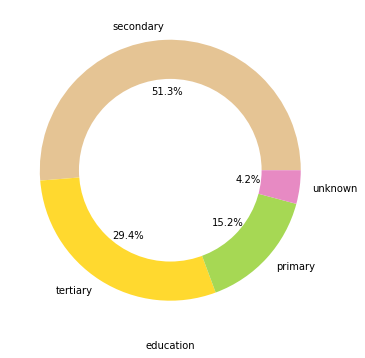

<Figure size 432x288 with 0 Axes>

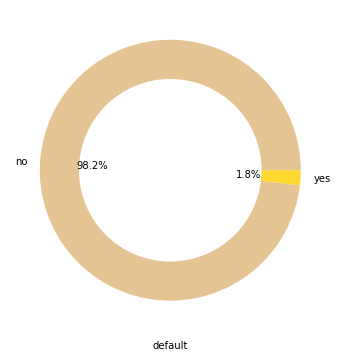

<Figure size 432x288 with 0 Axes>

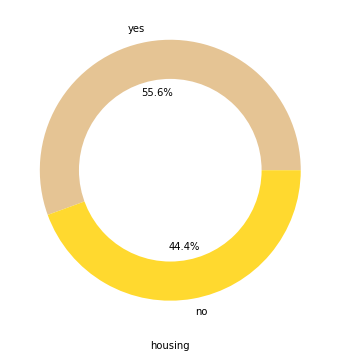

<Figure size 432x288 with 0 Axes>

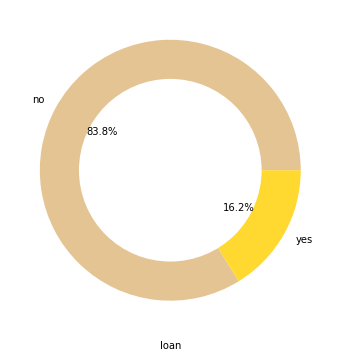

<Figure size 432x288 with 0 Axes>

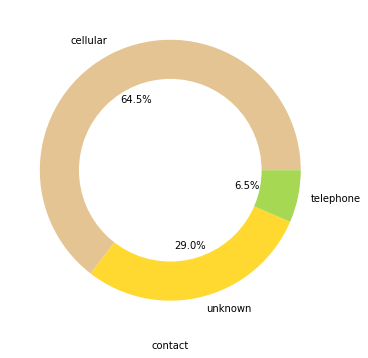

<Figure size 432x288 with 0 Axes>

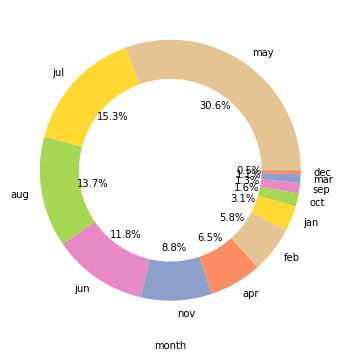

<Figure size 432x288 with 0 Axes>

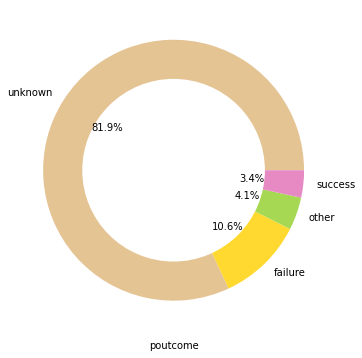

<Figure size 432x288 with 0 Axes>

In [12]:
for i in categorical:
        plt.figure(figsize=(8,6))
        df_train[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()

# Bivariate Analysis

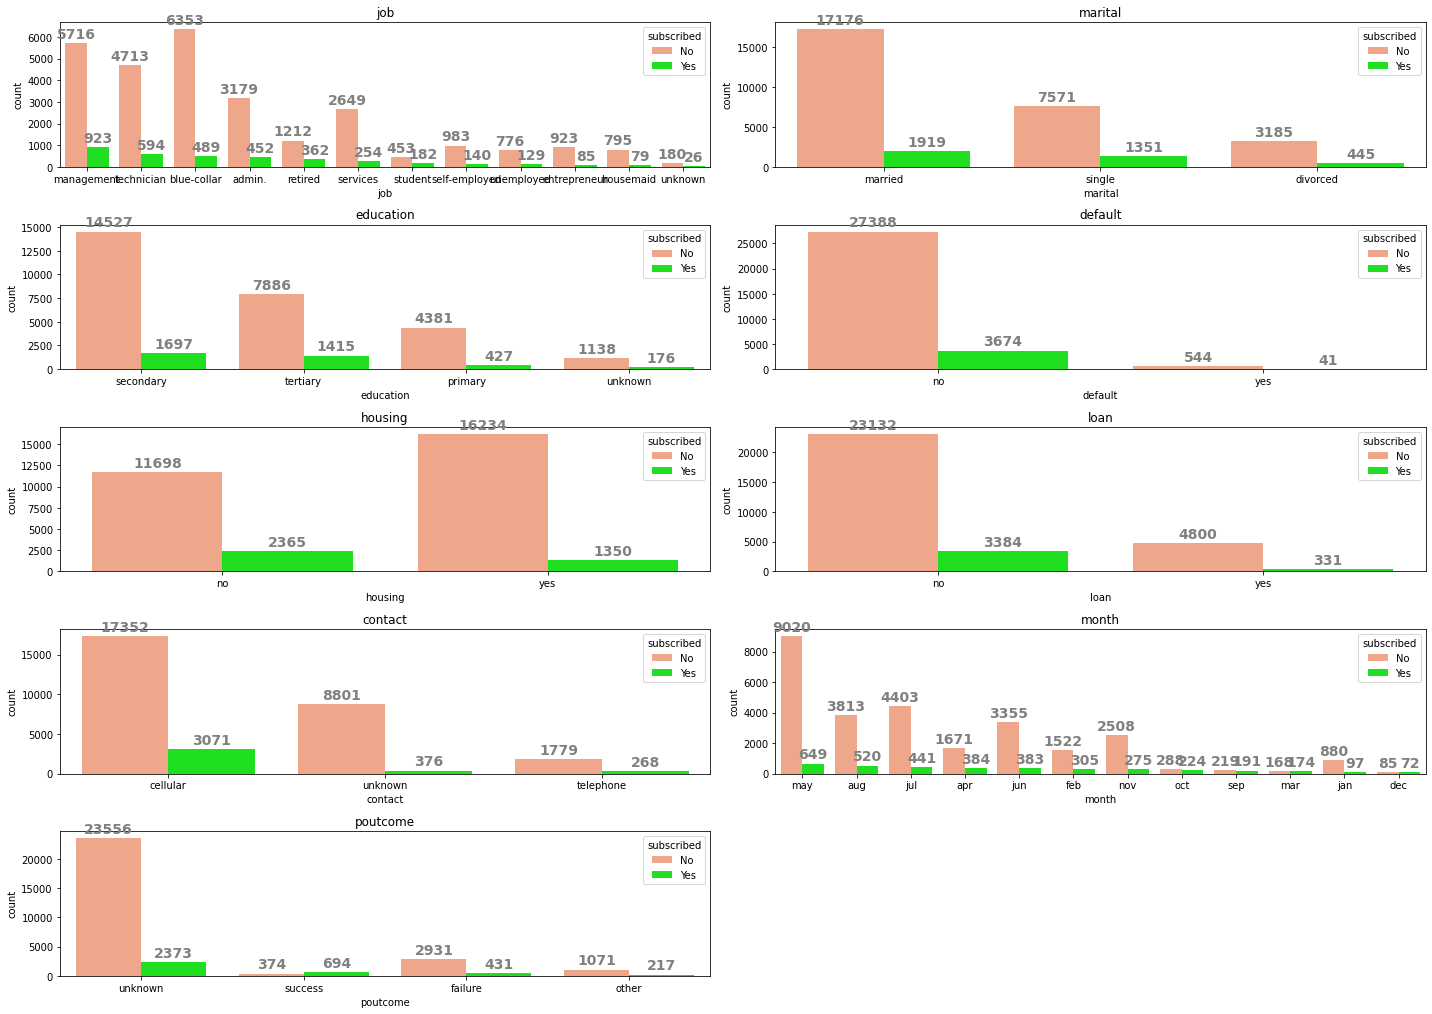

In [13]:
# plot all categorical features
plt.figure(figsize = (20, 25))
for i in range(len(categorical)):
    plt.subplot(len(categorical)//1, 2, i + 1)
    ax = sns.countplot(
        x = df_train[categorical[i]],hue = df_train['subscribed'],
            # order by frequency
            order = pd.crosstab(df_train[categorical[i]], df_train['subscribed']).sort_values("yes", ascending = False).index,
            palette = {"yes":"lime", "no":"lightsalmon"}
    )
    plt.title(categorical[i], fontweight = 20)
    
     # annotate bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center',
            fontweight = 'semibold',
            size = 14,
            xytext = (0, 5), 
            textcoords = 'offset points',
            color = 'grey'
        )
        L = ax.legend(loc='upper right', title="subscribed")
        L.get_texts()[0].set_text('No')
        L.get_texts()[1].set_text('Yes')
plt.tight_layout()
plt.show()

<AxesSubplot: xlabel='housing', ylabel='count'>

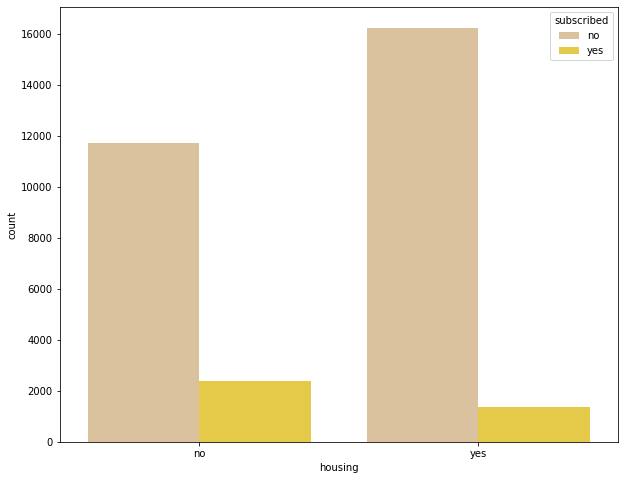

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(x=df_train['housing'],hue=df_train['subscribed'])
              

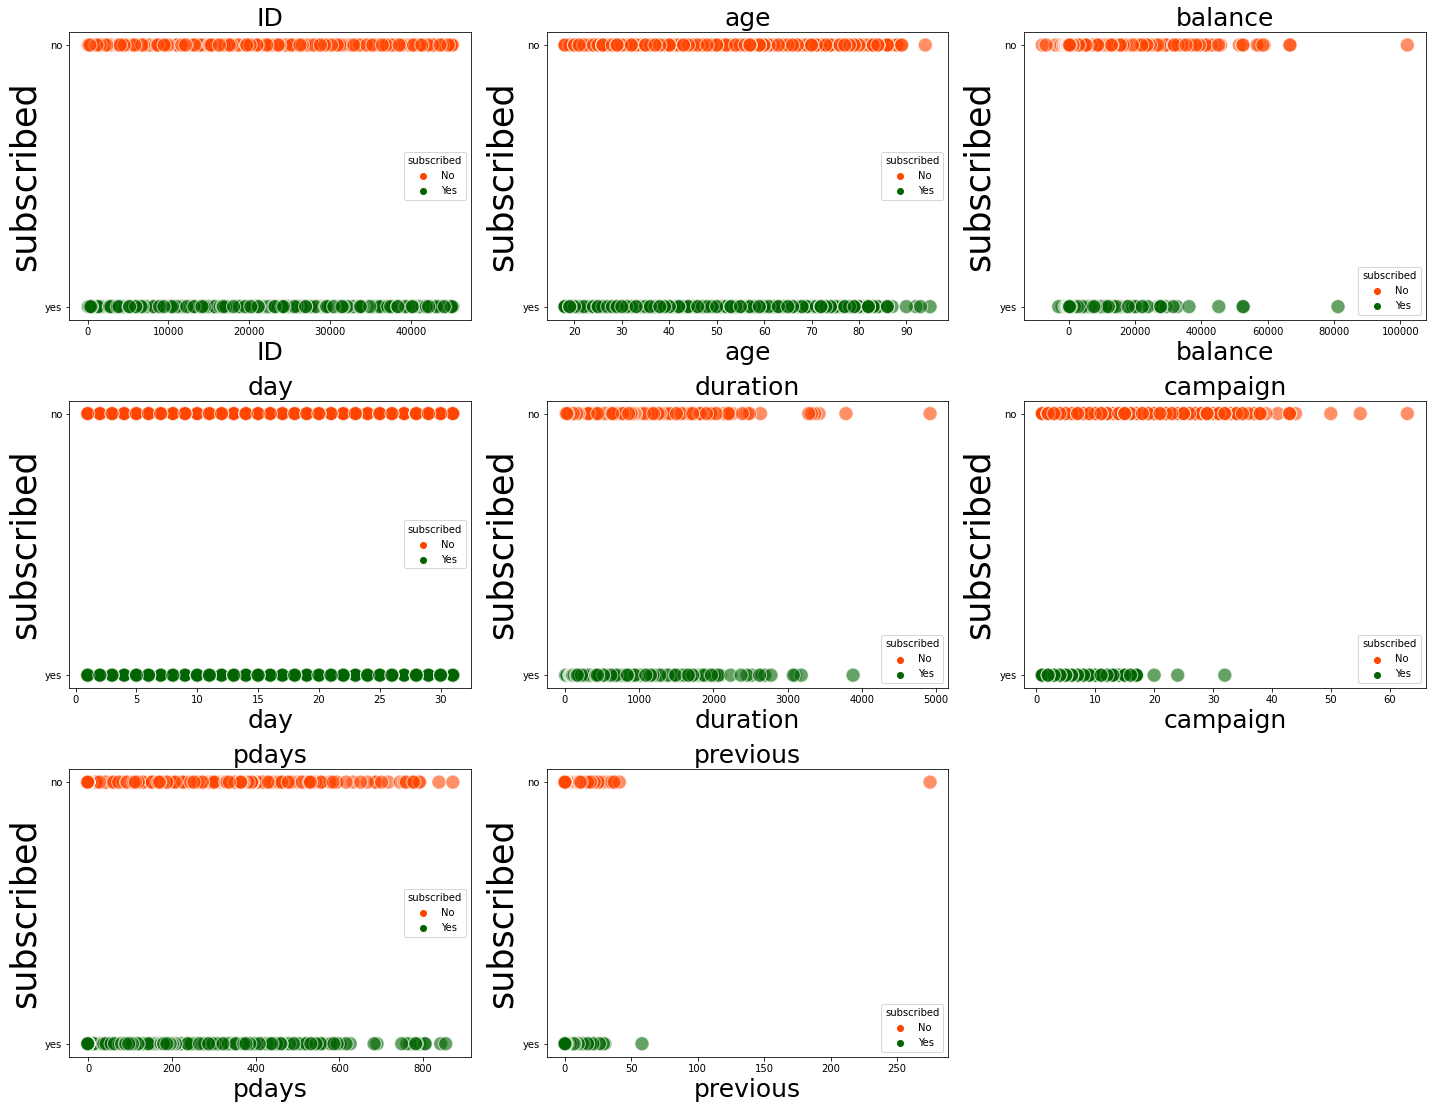

In [15]:
# plot all numerical features
plt.figure(figsize = (20, 20))
for i in range(len(numerical)):
    plt.subplot(len(numerical)//2, 3, i + 1)    
    ax = sns.scatterplot(
        x = df_train[numerical[i]], y = df_train['subscribed'], hue = df_train['subscribed'], s = 200, alpha = 0.6,
        palette = {"yes":"darkgreen", "no":"orangered"}
    )
    ax.set_title(numerical[i], fontsize = 25)
    ax.set_xlabel(xlabel=numerical[i], fontsize=25)
    ax.set_ylabel(ylabel="subscribed",fontsize=35)
    
    L = ax.legend(title="subscribed")
    L.get_texts()[0].set_text('No')
    L.get_texts()[1].set_text('Yes')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'subscribed: target variable')

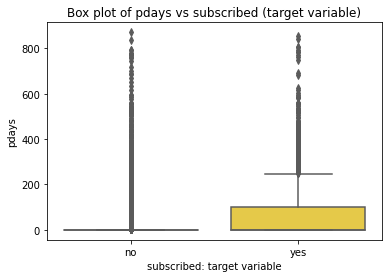

In [16]:
sns.boxplot(y=df_train['pdays'], x=df_train['subscribed'])
plt.title('Box plot of pdays vs subscribed (target variable)')
plt.xlabel('subscribed: target variable')

Text(0.5, 1.0, 'PDF of pdays for target variable subscribed')

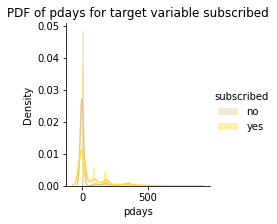

In [17]:
sns.FacetGrid(df_train, hue='subscribed').map(sns.distplot, 'pdays').add_legend()
plt.title('PDF of pdays for target variable subscribed')

In [18]:
df_train.pdays.describe()


count    31647.000000
mean        39.576042
std         99.317592
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [19]:
for x in range(95, 101 , 1):
    print("{}% of pdays are less than equal to {}".format(x, df_train.pdays.quantile(x/100)))
iqr = df_train.pdays.quantile(0.75) - df_train.pdays.quantile(0.25)
print('IQR {}'.format(iqr))

95% of pdays are less than equal to 313.0
96% of pdays are less than equal to 336.0
97% of pdays are less than equal to 348.0
98% of pdays are less than equal to 358.0
99% of pdays are less than equal to 370.0
100% of pdays are less than equal to 871.0
IQR 0.0


Observation:

The attribute pdays seems to be important feature as there is a clear distinction in quartile ranges of pdays for target variable yes and no.

75% clients contacted through campaign are not previously contacted.

Mean of pdays is 40.20

There are outliers as we can see from boxplot.

Text(0.5, 0, 'subscribed:target variable')

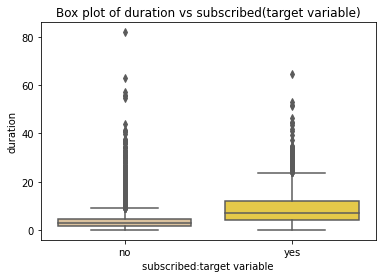

In [20]:
#duration
# converting call duration from seconds to minute
df_train['duration'] = df_train['duration']/60
sns.boxplot(y=df_train['duration'], x=df_train['subscribed'])
plt.title('Box plot of duration vs subscribed(target variable)')
plt.xlabel('subscribed:target variable')

Text(0.5, 1.0, 'PDF of duration for target variable subscribed')

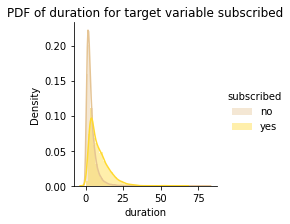

In [21]:
sns.FacetGrid(df_train, hue='subscribed').map(sns.distplot, 'duration').add_legend()
plt.title('PDF of duration for target variable subscribed')

In [22]:
df_train.duration.describe()


count    31647.000000
mean         4.301892
std          4.285316
min          0.000000
25%          1.733333
50%          3.000000
75%          5.308333
max         81.966667
Name: duration, dtype: float64

In [23]:
for x in range(95, 101 , 1):
    print("{}% of calls have duration less than equal to {}".format(x, df_train.duration.quantile(x/100)))
iqr = df_train.duration.quantile(0.75) - df_train.duration.quantile(0.25)
print('IQR {}'.format(iqr))

95% of calls have duration less than equal to 12.533333333333333
96% of calls have duration less than equal to 13.716666666666667
97% of calls have duration less than equal to 15.183333333333334
98% of calls have duration less than equal to 17.433333333333334
99% of calls have duration less than equal to 20.983333333333334
100% of calls have duration less than equal to 81.96666666666667
IQR 3.575


Observation:

The attribute duration seems to be important feature as there is a clear distinction in quartile ranges of duration for target variable yes and no.

75% call duration are less than or equal to 5.32

duration have a mean of 4.30 and standard-deviation 4.29

There are outliers points in duration.

Text(0.5, 0, 'subscribed:target variable')

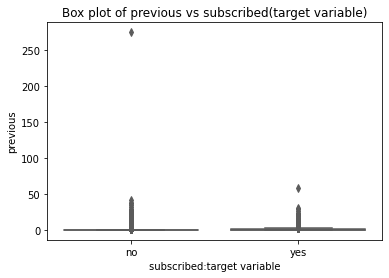

In [24]:
#previous
sns.boxplot(y=df_train['previous'], x=df_train['subscribed'])
plt.title('Box plot of previous vs subscribed(target variable)')
plt.xlabel('subscribed:target variable')

Text(0.5, 1.0, 'PDF of previous values for target variable subscribed')

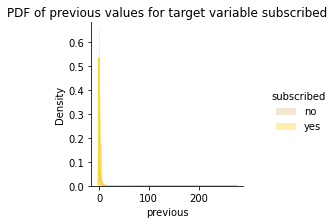

In [25]:
sns.FacetGrid(df_train, hue='subscribed').map(sns.distplot, 'previous').add_legend()
plt.title('PDF of previous values for target variable subscribed')

In [26]:
df_train.previous.describe()


count    31647.000000
mean         0.574272
std          2.422529
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [27]:
for x in range(95, 101 , 1):
    print("{}% of previous values less than equal to {}".format(x, df_train.previous.quantile(x/100)))
iqr = df_train.previous.quantile(0.75) - df_train.previous.quantile(0.25)
print('IQR {}'.format(iqr))

95% of previous values less than equal to 3.0
96% of previous values less than equal to 4.0
97% of previous values less than equal to 5.0
98% of previous values less than equal to 6.0
99% of previous values less than equal to 9.0
100% of previous values less than equal to 275.0
IQR 0.0


Observation:

75% of previous values equal 0 and 99% values <= 8.90

duration have a mean of 0.58 and standard-deviation 2.30

There are outliers points in duration.

Text(0.5, 0, 'subscribed:target variable')

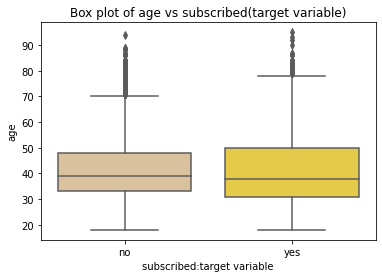

In [28]:
#age
sns.boxplot(y=df_train['age'], x=df_train['subscribed'])
plt.title('Box plot of age vs subscribed(target variable)')
plt.xlabel('subscribed:target variable')

Text(0.5, 1.0, 'PDF of age for target variable subscribed')

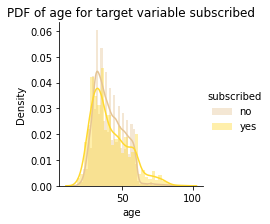

In [29]:
sns.FacetGrid(df_train, hue='subscribed').map(sns.distplot, 'age').add_legend()
plt.title('PDF of age for target variable subscribed')

In [30]:
df_train.age.describe()

count    31647.000000
mean        40.957247
std         10.625134
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [31]:
for x in range(95, 101 , 1):
    print("{}% of people having age are less than equal to {}".format(x, df_train.age.quantile(x/100)))
iqr = df_train.age.quantile(0.75) - df_train.age.quantile(0.25)
print('IQR {}'.format(iqr))

95% of people having age are less than equal to 59.0
96% of people having age are less than equal to 59.0
97% of people having age are less than equal to 60.0
98% of people having age are less than equal to 63.0
99% of people having age are less than equal to 71.0
100% of people having age are less than equal to 95.0
IQR 15.0


In [32]:
lst = [df_train]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 30
    column.loc[(column["age"] >= 30) & (column["age"] <= 44), 'age_group'] = 40
    column.loc[(column["age"] >= 45) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [33]:
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,age_group
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,0.733333,2,-1,0,unknown,no,50.0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,1.516667,2,-1,0,unknown,no,40.0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,4.000000,1,-1,0,unknown,no,30.0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,14.450000,1,84,3,success,yes,50.0
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,6.333333,1,-1,0,unknown,no,40.0


In [34]:
count_age_response_pct = pd.crosstab(df_train['subscribed'],df_train['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()
count_age_response_pct

subscribed,no,yes
age_group,,
30.0,82.489851,17.510149
40.0,89.854475,10.145525
50.0,90.343127,9.656873
60.0,67.389558,32.610442


<AxesSubplot: xlabel='age_group', ylabel='count'>

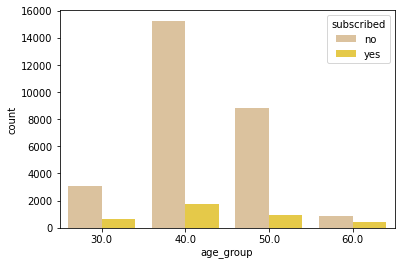

In [35]:
sns.countplot(x='age_group', data=df_train, hue='subscribed')

Observation:

People with age < 30 or 60+ have higher success rate.

Only 3% of clients have age of 60+

In [36]:
#Jobs
df_train.job.value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

Text(0.5, 1.0, 'Count Plot of job for target variable')

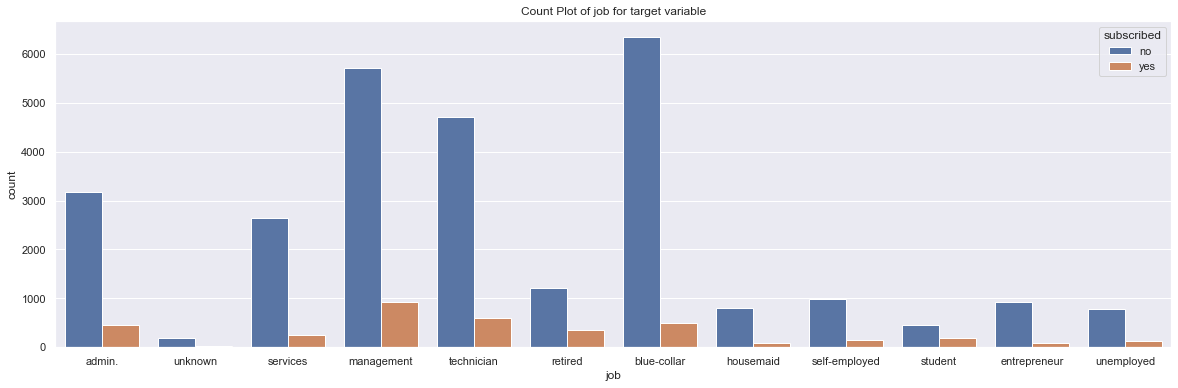

In [37]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x=df_train['job'], data=df_train, hue=df_train['subscribed'])
plt.title('Count Plot of job for target variable')

Observation:

Top contacted clients are from job type: 'blue-collar', 'management' & 'technician'
    
Success rate is highest for student

In [38]:
df_train.poutcome.value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

Text(0.5, 1.0, 'Count Plot of poutcome for target variable')

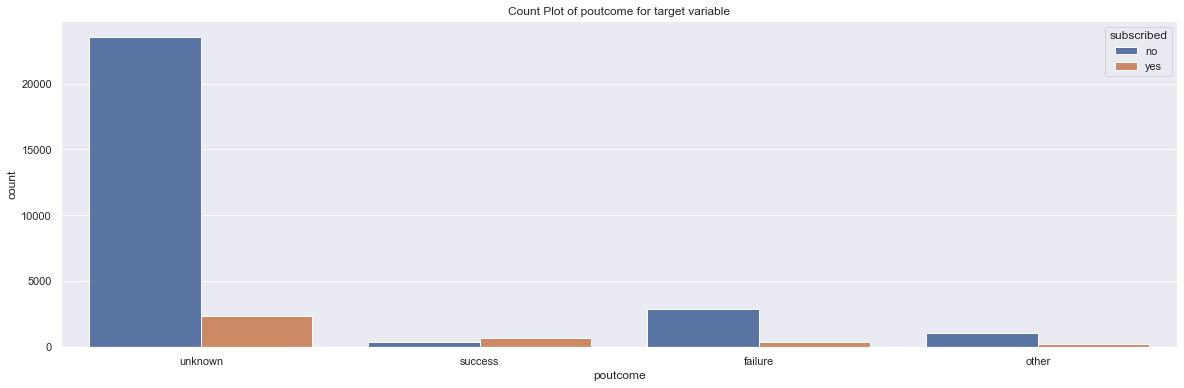

In [39]:
sns.countplot(x=df_train['poutcome'], data=df_train, hue=df_train['subscribed'])
plt.title('Count Plot of poutcome for target variable')

Observation:

Most of the clients contacted have previous outcome as 'unknown'.

In [40]:
#education
df_train.education.value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

Text(0.5, 1.0, 'Count plot of education for target variable subscribed')

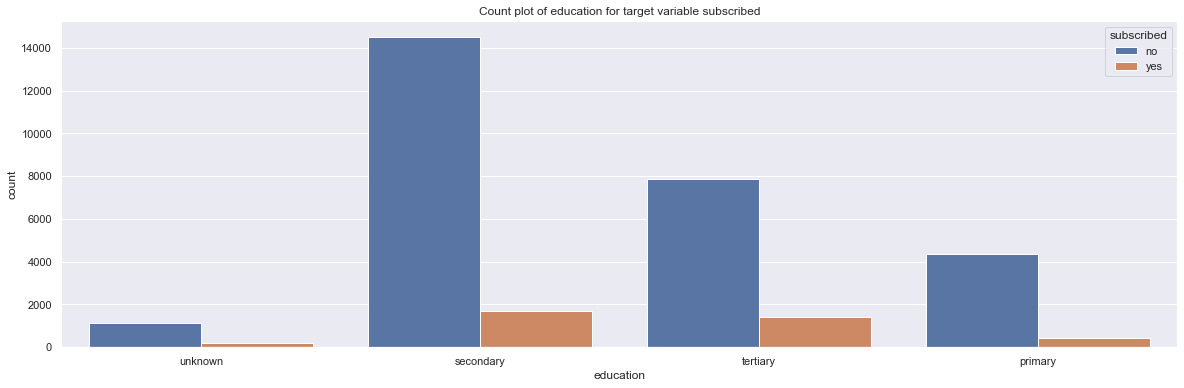

In [41]:
sns.countplot(x=df_train['education'], data=df_train, hue=df_train['subscribed'])
plt.title('Count plot of education for target variable subscribed')

Observation:

Most of the people who are contacted have tertiray or secondary education.

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


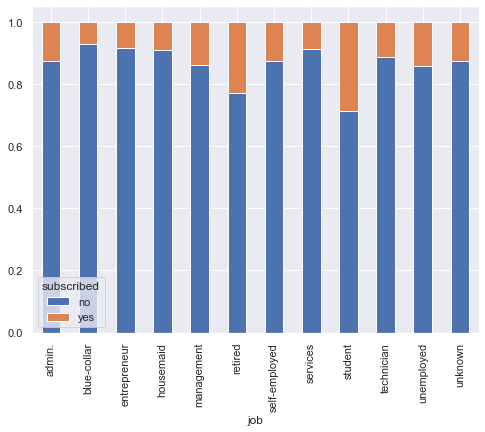

In [42]:
#job vs subscribed
print(pd.crosstab(df_train['job'],df_train['subscribed']))
job = pd.crosstab(df_train['job'],df_train['subscribed'])
job_norm = job.div(job.sum(1).astype(float), axis=0)
job_norm.plot.bar(stacked=True,figsize=(8,6));

From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit,
which is surprising as students generally do not subscribe to a term deposit.

The possible reason is that the number of students in the dataset is less and comparatively to other job types,
more students have subscribed to a term deposit.

no     31062
yes      585
Name: default, dtype: int64


Text(0.5, 1.0, 'Count plot of default for target variable subscribed')

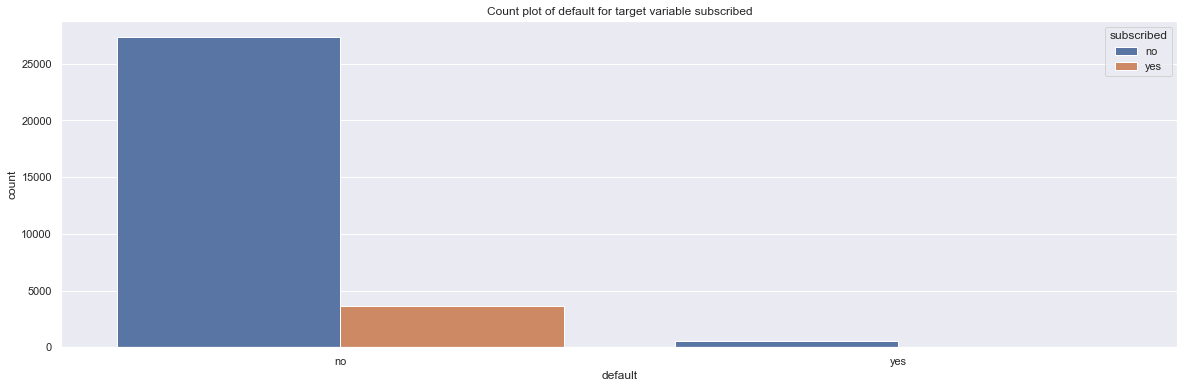

In [43]:
#default
print(df_train.default.value_counts())
sns.countplot(x=df_train['default'], data=df_train, hue=df_train['subscribed'])
plt.title('Count plot of default for target variable subscribed')

Subscribed count 585

subscribed        no       yes
default                       
no          0.881720  0.118280
yes         0.929915  0.070085


<AxesSubplot: xlabel='default'>

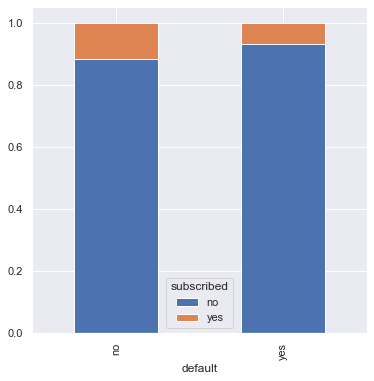

In [44]:
print("Subscribed count",df_train[df_train['default'] == 'yes'].subscribed.count())
print()
dflt = pd.crosstab(df_train['default'], df_train['subscribed'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
print(dflt_norm)
dflt_norm.plot.bar(stacked=True, figsize=(6,6))

Observation:
    
Very few clients are contacted who are defaulter

no     26516
yes     5131
Name: loan, dtype: int64


Text(0.5, 1.0, 'Count plot of loan for target variable subscribed')

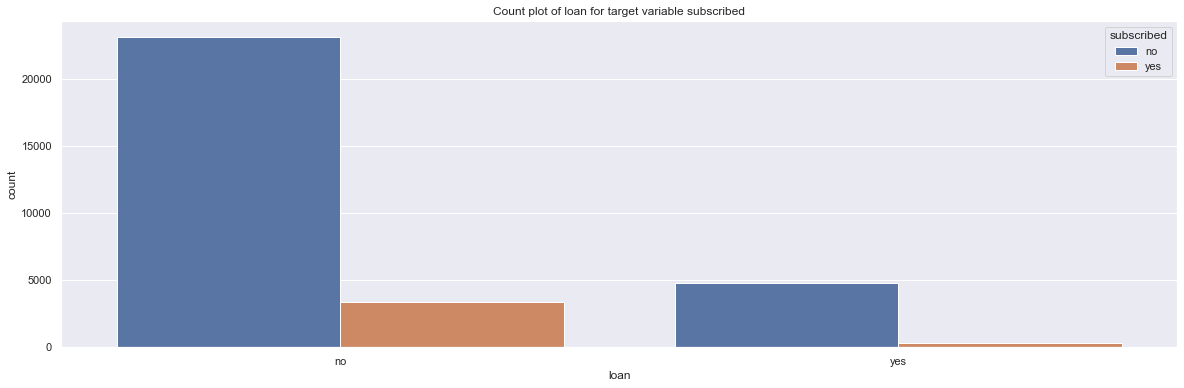

In [45]:
#loan
print(df_train.loan.value_counts())
sns.countplot(x=df_train['loan'], data=df_train, hue=df_train['subscribed'])
plt.title('Count plot of loan for target variable subscribed')

Observation:

As seen for default variable, less clients are contacted who have loan.

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


Text(0.5, 1.0, 'Count plot of contact for target variable subscribed')

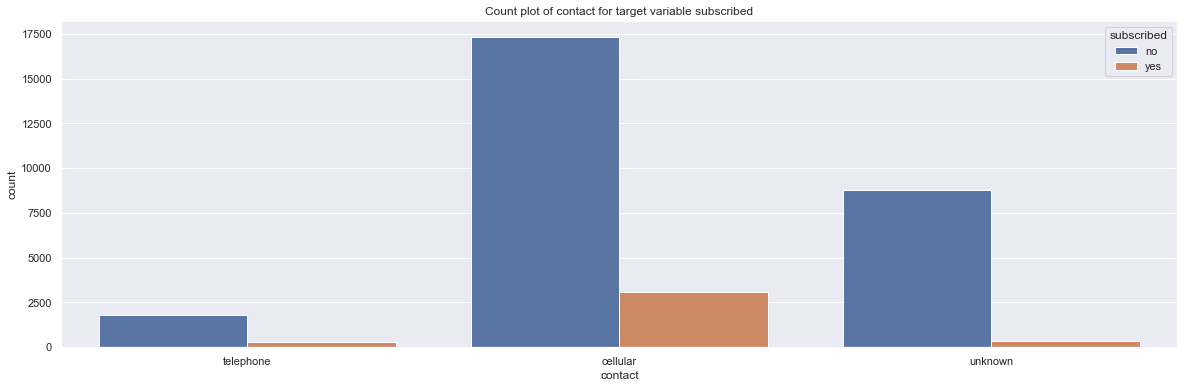

In [46]:
#contact
print(df_train.contact.value_counts())
sns.countplot(x=df_train['contact'], data=df_train, hue=df_train['subscribed'])
plt.title('Count plot of contact for target variable subscribed')

Observation:
    
Most of the people are contacted through cellular

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64


Text(0.5, 1.0, 'Count plot of month for target variable subscribed')

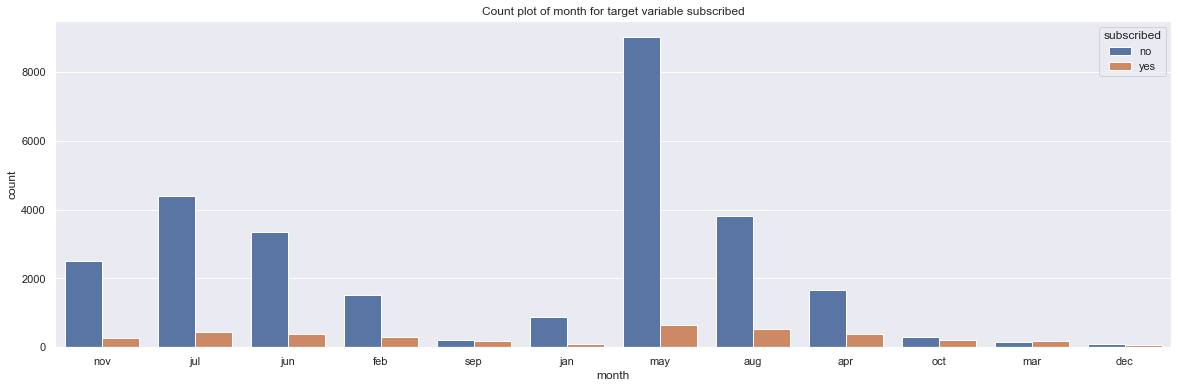

In [47]:
print(df_train.month.value_counts())
sns.countplot(x=df_train['month'], data=df_train, hue=df_train['subscribed'])
plt.title('Count plot of month for target variable subscribed')

In [48]:
df_train[df_train['month'] == 'jan'].subscribed.value_counts()

no     880
yes     97
Name: subscribed, dtype: int64

Observation:

Most of the clients (approx 1/3 of total) are contacted in the month of May but the success rate is only 6.7%.

March have highest success rate.

# MultiVariate Analysis

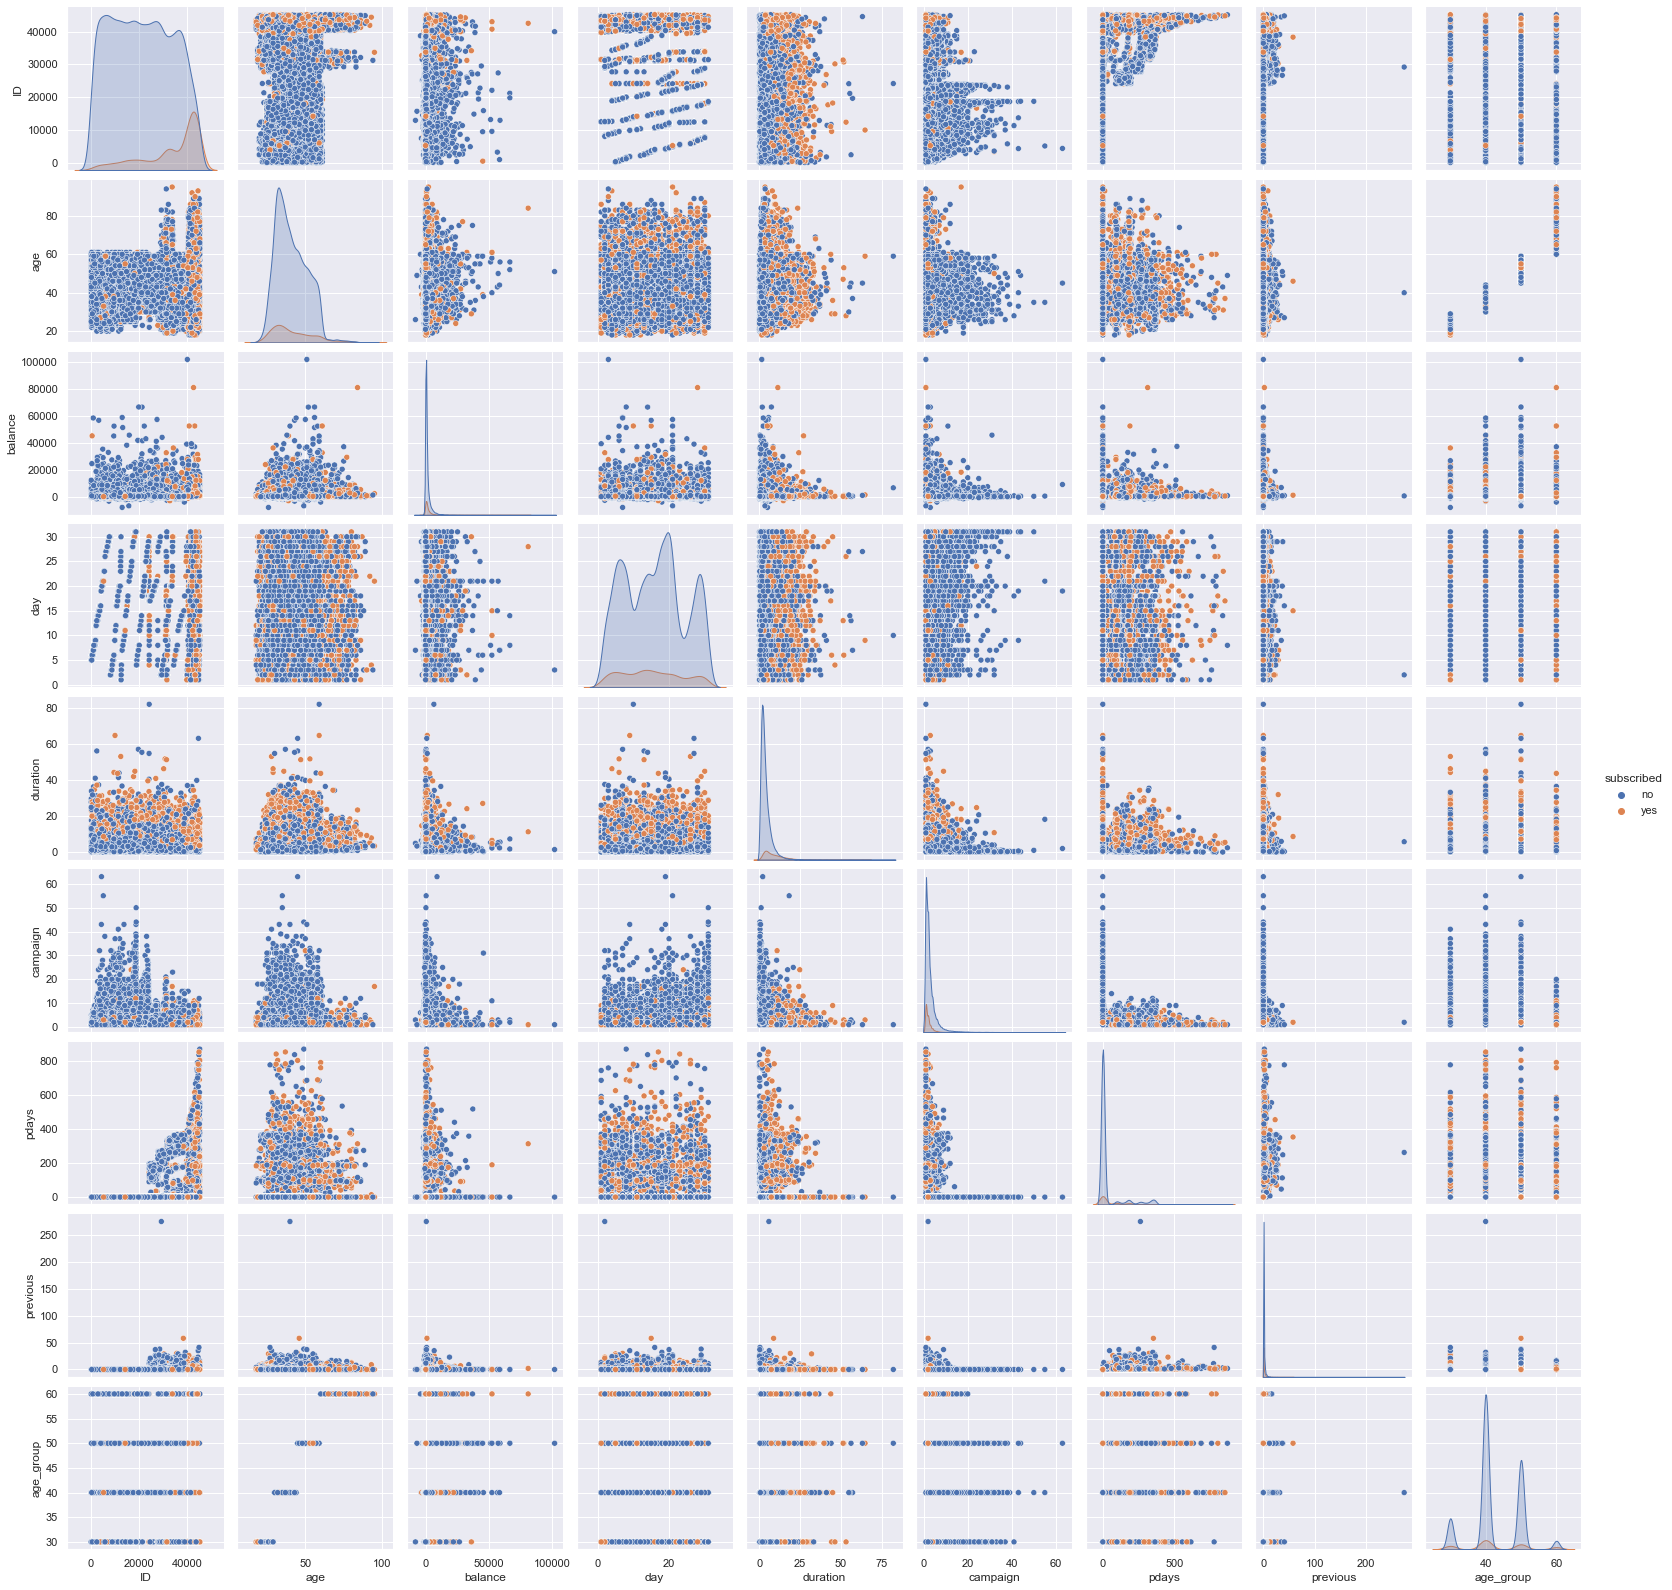

In [49]:
#PairPlot

sns.pairplot(df_train, hue='subscribed')

Observation:

For most of the variables our pair plot is overlapping a lot.

Pair plots of age-campaign and day-campaign are much efficient in distinguishing between different classes 
with very few overlapes.

# Correlation matrix of numerical features

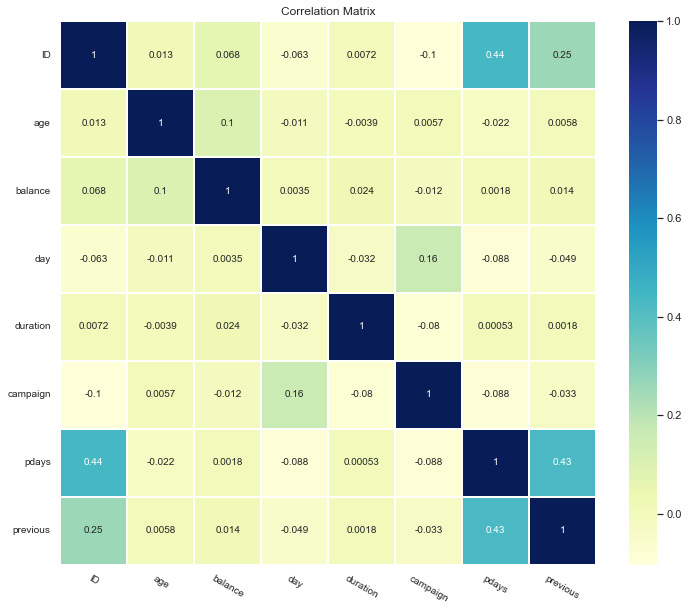

In [50]:
corr_data = df_train[numerical + ['subscribed']]
corr = corr_data.corr()
plt.close()
cor_plot = sns.heatmap(corr,annot=True,cmap='YlGnBu',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

Observation:

Over numerical features have very less correlation between them.

pdays and previous have higher correlation

duration have a higher correlation with our target variable

# Outlier detection for numerical attributes using IQR

In [51]:
# creating new data frame of numerical columns 
data_numerical = df_train[numerical]
print('Shape of numerical dataframe {}'.format(data_numerical.shape))
data_numerical.head()

Shape of numerical dataframe (31647, 8)


,ID,age,balance,day,duration,campaign,pdays,previous
0,26110,56,1933,19,0.733333,2,-1,0
1,40576,31,3,20,1.516667,2,-1,0
2,15320,27,891,18,4.000000,1,-1,0
3,43962,57,3287,22,14.450000,1,84,3
4,29842,31,119,4,6.333333,1,-1,0


In [52]:
q3 = data_numerical.quantile(0.75)
q1 = data_numerical.quantile(0.25)
iqr = q3 - q1
print('IQR for numerical attributes')
print(iqr)

IQR for numerical attributes
ID          22661.500
age            15.000
balance      1358.000
day            13.000
duration        3.575
campaign        2.000
pdays           0.000
previous        0.000
dtype: float64


In [53]:
data_out = df_train[~((data_numerical < (q1 - 1.5 * iqr)) |(data_numerical > (q3 + 1.5 * iqr))).any(axis=1)]
print('{} points are outliers based on IQR'.format(df_train.shape[0] - data_out.shape[0]))

11848 points are outliers based on IQR


In [54]:
df_train.shape

(31647, 19)

# Data PreProcessing

In [55]:
#Train Test Split
df_train.replace(to_replace={'subscribed':'yes'}, value=1, inplace=True)
df_train.replace(to_replace={'subscribed':'no'}, value=0, inplace=True)
df_train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,age_group
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,0.733333,2,-1,0,unknown,0,50.0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,1.516667,2,-1,0,unknown,0,40.0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,4.000000,1,-1,0,unknown,0,30.0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,14.450000,1,84,3,success,1,50.0
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,6.333333,1,-1,0,unknown,0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,1.933333,2,-1,0,unknown,0,30.0
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,7.300000,2,-1,0,unknown,1,50.0
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,0.616667,3,-1,0,unknown,0,40.0
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,0.366667,7,337,12,failure,0,50.0


In [56]:
# Convert the columns into categorical variables
data1 = df_train.copy()
data1['job'] = data1['job'].astype('category').cat.codes
data1['marital'] = data1['marital'].astype('category').cat.codes
data1['education'] = data1['education'].astype('category').cat.codes
data1['contact'] = data1['contact'].astype('category').cat.codes
data1['poutcome'] = data1['poutcome'].astype('category').cat.codes
data1['month'] = data1['month'].astype('category').cat.codes
data1['default'] = data1['default'].astype('category').cat.codes
data1['loan'] = data1['loan'].astype('category').cat.codes
data1['housing'] = data1['housing'].astype('category').cat.codes
data1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,age_group
0,26110,56,0,1,3,0,1933,0,0,1,19,9,0.733333,2,-1,0,3,0,50.0
1,40576,31,11,1,1,0,3,0,0,0,20,5,1.516667,2,-1,0,3,0,40.0
2,15320,27,7,1,1,0,891,1,0,0,18,5,4.000000,1,-1,0,3,0,30.0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,14.450000,1,84,3,2,1,50.0
4,29842,31,9,1,1,0,119,1,0,0,4,3,6.333333,1,-1,0,3,0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4,2,2,0,0,1,0,0,12,8,1.933333,2,-1,0,3,0,30.0
31643,40178,53,4,0,2,0,380,0,1,0,5,6,7.300000,2,-1,0,3,1,50.0
31644,19710,32,4,2,2,0,312,0,0,0,7,1,0.616667,3,-1,0,3,0,40.0
31645,38556,57,9,1,1,0,225,1,0,1,15,8,0.366667,7,337,12,0,0,50.0


In [57]:
y = df_train['subscribed']
x_train, x_test, y_train, y_test = train_test_split(df_train.drop(['subscribed'], axis=1), y, test_size=0.20, random_state=42)
print('Train data shape {} {}'.format(x_train.shape, y_train.shape))
print('Test data shape {} {}'.format(x_test.shape, y_test.shape))

Train data shape (25317, 18) (25317,)
Test data shape (6330, 18) (6330,)


# Feature selection with Select KBest

In [58]:
import pandas as pd
import numpy as np

# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = data1.drop('subscribed', axis=1) #independent columns
y = data1['subscribed'].values# Output variable


#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

        Specs        Score
12   duration  5671.062516
0          ID  3053.803240
9     contact   728.909409
7     housing   642.748084
14      pdays   375.492162
15   previous   247.430356
16   poutcome   208.446461
8        loan   166.127429
13   campaign   158.549603
4   education   138.662064


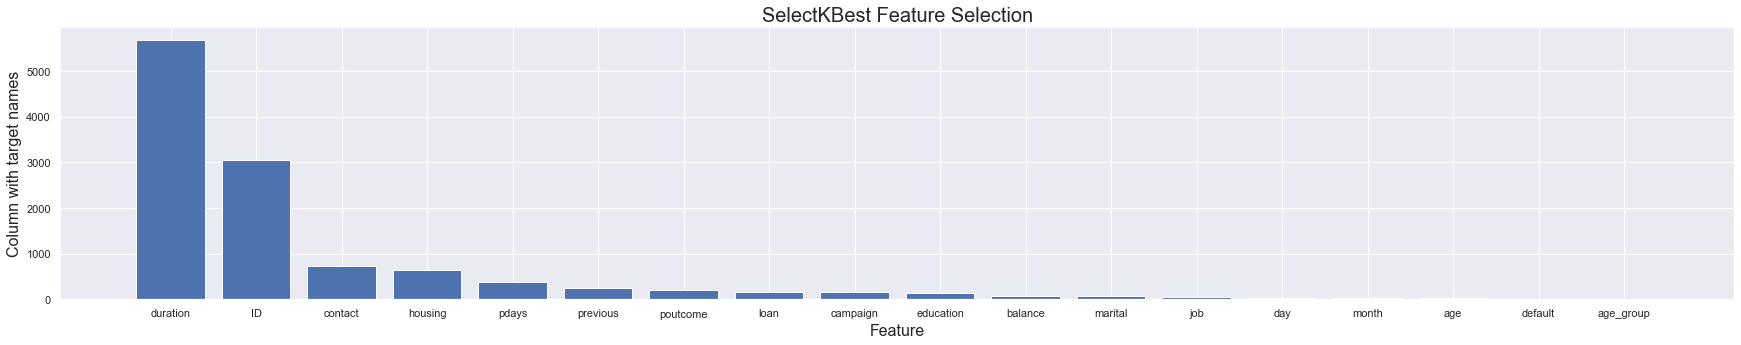

In [59]:
# Plotting the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(30,5))
plt.bar('Specs','Score',data=df_sorted_desc)
plt.xlabel("Feature",fontsize=16)
plt.ylabel("Column with target names",fontsize=16)
plt.title("SelectKBest Feature Selection",fontsize=20)
plt.show()

In [60]:
X = data1.drop('subscribed', axis=1).values
y = data1['subscribed'].values

pp=data1.drop('subscribed', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
feature_importances = pd.DataFrame(rfc.feature_importances_,index = pp.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
duration,0.274228
ID,0.213379
balance,0.080828
age,0.069710
day,0.062344
month,0.046833
job,0.037914
pdays,0.033114
campaign,0.031864
poutcome,0.031189


Important features will be consider for machine learning models:

AgeGroup & Default are least considered features

Also, will check VIF for multi Collinearity before finalizing 



   

   

In [61]:
y = df_train['subscribed']

x_train, x_test, y_train, y_test = train_test_split(df_train.drop(['subscribed'], axis=1), y, test_size=0.20, random_state=42)
print('Train data shape {} {}'.format(x_train.shape, y_train.shape))


Train data shape (25317, 18) (25317,)


# VIF

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_features = df_train.drop(columns=["subscribed"])
vif = pd.DataFrame()
vif["features"] = df_features.select_dtypes("number").columns
vif["VIF"] = [variance_inflation_factor(df_features.select_dtypes("number").values, i) for i in range(len(vif))]
vif

,features,VIF
0,ID,4.746381
1,age,69.457202
2,balance,1.223017
3,day,4.485174
4,duration,1.970214
5,campaign,1.847284
6,pdays,1.662967
7,previous,1.303802
8,age_group,86.998081


In [63]:
vif = pd.DataFrame()
vif["features"] = df_features.select_dtypes("number").drop(columns=["age_group"]).columns
vif["VIF"] = [variance_inflation_factor(df_features.select_dtypes("number").drop(columns=["age_group"]).values, i) for i in range(len(vif))]
vif

,features,VIF
0,ID,4.394213
1,age,6.497954
2,balance,1.222626
3,day,4.045811
4,duration,1.917838
5,campaign,1.815490
6,pdays,1.662938
7,previous,1.303267


In [64]:
#VIF =1 --->No Correlation between independent variable and other variables
#VIF > 5 or 10 --High multicollinearlirty btwn independent variables and others
#Removing AgeGroup column
df_train.drop(['age_group'], axis=1,inplace = True)
display(df_train)


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,0.733333,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,1.516667,2,-1,0,unknown,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,4.000000,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,14.450000,1,84,3,success,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,6.333333,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,1.933333,2,-1,0,unknown,0
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,7.300000,2,-1,0,unknown,1
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,0.616667,3,-1,0,unknown,0
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,0.366667,7,337,12,failure,0


# Encoding Catergorial data

Non-ordinal feature:

    job, marital, default, housing,month, loan, contact, poutcome.
    
    encoded using Label encoder.
    
Ordinal feature:

    education.
    
    encoded using ordinal encoder.
    


In [65]:
print('Categorical features:', categorical)
print('Numerical features:', numerical)

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical features: ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


# Non-ordinal

In [66]:
non_ordinal_cols = [i for i in categorical if i not in ["education"]]
non_ordinal_cols

['job',
 'marital',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [67]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# encoding the categorical variables
encoder = preprocessing.LabelEncoder()
df_train['job'] = encoder.fit_transform(df_train['job'])
df_train['marital'] = encoder.fit_transform(df_train['marital'])
df_train['default'] = encoder.fit_transform(df_train['default'])
df_train['housing'] = encoder.fit_transform(df_train['housing'])
df_train['loan'] = encoder.fit_transform(df_train['loan'])
df_train['poutcome'] = encoder.fit_transform(df_train['poutcome'])
df_train['contact'] = encoder.fit_transform(df_train['contact'])
df_train['month'] = encoder.fit_transform(df_train['month'])
df_train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,unknown,0,1933,0,0,1,19,9,0.733333,2,-1,0,3,0
1,40576,31,11,1,secondary,0,3,0,0,0,20,5,1.516667,2,-1,0,3,0
2,15320,27,7,1,secondary,0,891,1,0,0,18,5,4.000000,1,-1,0,3,0
3,43962,57,4,0,tertiary,0,3287,0,0,0,22,6,14.450000,1,84,3,2,1
4,29842,31,9,1,secondary,0,119,1,0,0,4,3,6.333333,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4,2,tertiary,0,0,1,0,0,12,8,1.933333,2,-1,0,3,0
31643,40178,53,4,0,tertiary,0,380,0,1,0,5,6,7.300000,2,-1,0,3,1
31644,19710,32,4,2,tertiary,0,312,0,0,0,7,1,0.616667,3,-1,0,3,0
31645,38556,57,9,1,secondary,0,225,1,0,1,15,8,0.366667,7,337,12,0,0


# Ordinal

In [68]:
df_train["education"].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

In [69]:
from sklearn.preprocessing import OrdinalEncoder

education_encoder = OrdinalEncoder(categories = [['primary', 'secondary', 'tertiary']], handle_unknown="use_encoded_value", 
                                   unknown_value=-1, dtype = np.int64)
except_unknown_idx = list(df_train[df_train['education'] != 'unknown'].index)
unknown_idx = list(df_train[df_train['education'] == 'unknown'].index)

df_train.loc[except_unknown_idx, 'education'] = education_encoder.fit_transform(np.expand_dims(np.array(df_train['education'].iloc[except_unknown_idx]), axis=1))
df_train.loc[unknown_idx, 'education'] = education_encoder.transform(np.expand_dims(np.array(df_train['education'].iloc[unknown_idx]), axis=1))
df_train["education"].value_counts()


 1    16224
 2     9301
 0     4808
-1     1314
Name: education, dtype: int64

In [70]:
df_train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,-1,0,1933,0,0,1,19,9,0.733333,2,-1,0,3,0
1,40576,31,11,1,1,0,3,0,0,0,20,5,1.516667,2,-1,0,3,0
2,15320,27,7,1,1,0,891,1,0,0,18,5,4.000000,1,-1,0,3,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,14.450000,1,84,3,2,1
4,29842,31,9,1,1,0,119,1,0,0,4,3,6.333333,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4,2,2,0,0,1,0,0,12,8,1.933333,2,-1,0,3,0
31643,40178,53,4,0,2,0,380,0,1,0,5,6,7.300000,2,-1,0,3,1
31644,19710,32,4,2,2,0,312,0,0,0,7,1,0.616667,3,-1,0,3,0
31645,38556,57,9,1,1,0,225,1,0,1,15,8,0.366667,7,337,12,0,0


In [71]:

print('Categorical features:', categorical)
print('Numerical features:', numerical)


Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical features: ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [72]:
#Split the data into independent & dependent variables

features=df_train.drop("subscribed",axis=1)
print("Independent Variables or Features DataFrame\n")
display(features)

target=df_train["subscribed"]
print("Target or Dependent Variable DataFrame\n")
display(target)

Independent Variables or Features DataFrame



,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26110,56,0,1,-1,0,1933,0,0,1,19,9,0.733333,2,-1,0,3
1,40576,31,11,1,1,0,3,0,0,0,20,5,1.516667,2,-1,0,3
2,15320,27,7,1,1,0,891,1,0,0,18,5,4.000000,1,-1,0,3
3,43962,57,4,0,2,0,3287,0,0,0,22,6,14.450000,1,84,3,2
4,29842,31,9,1,1,0,119,1,0,0,4,3,6.333333,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4,2,2,0,0,1,0,0,12,8,1.933333,2,-1,0,3
31643,40178,53,4,0,2,0,380,0,1,0,5,6,7.300000,2,-1,0,3
31644,19710,32,4,2,2,0,312,0,0,0,7,1,0.616667,3,-1,0,3
31645,38556,57,9,1,1,0,225,1,0,1,15,8,0.366667,7,337,12,0


Target or Dependent Variable DataFrame



0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

# Base Machine Learning Model-Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

lr=LogisticRegression()  

# Find best random state value where training accuracy = testing accuracy

Random_State=[]
Training_Accuracy=[]
Testing_Accuracy=[]
Difference=[]

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)

    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        Random_State.append(i)
        Training_Accuracy.append(accuracy_score(y_train,pred_train)*100)
        Testing_Accuracy.append(accuracy_score(y_test,pred_test)*100)
        Difference.append((accuracy_score(y_test,pred_test)*100)-(accuracy_score(y_train,pred_train)*100))

RS_table=pd.DataFrame({"Random State":Random_State,"Training Accuracy":Training_Accuracy,"Testing Accuracy":Testing_Accuracy,"Difference":Difference})
print("Data Frame random state values with training accuracy = testing accuracy")
RS_table.sort_values(by=["Difference"],ascending=True)

Data Frame random state values with training accuracy = testing accuracy


,Random State,Training Accuracy,Testing Accuracy,Difference
80,975,88.948138,88.862559,-0.085578
22,297,88.940238,88.862559,-0.077679
24,317,88.936288,88.862559,-0.073729
1,34,88.944188,88.878357,-0.065831
58,724,88.928388,88.862559,-0.065829
...,...,...,...,...
57,708,88.880989,88.925750,0.044761
38,476,88.865189,88.909953,0.044763
34,432,88.754592,88.815166,0.060574
0,4,88.778291,88.846761,0.068470


In [74]:
# Ideal random state where training accuracy == testing accuracy
RSN=RS_table["Random State"][RS_table["Difference"]==RS_table["Difference"].min()]
randomstate=np.array(RSN)[0]
randomstate


975

In [75]:
# using ideal random state---> split the data
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=randomstate)

In [76]:
# Train  model ---> check accuracy score with one best random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print(accuracy_score(y_test,pred_test))
print(classification_report(y_test,pred_test)) 
print(confusion_matrix(y_test,pred_test))

0.8886255924170616
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5589
           1       0.56      0.22      0.31       741

    accuracy                           0.89      6330
   macro avg       0.73      0.60      0.63      6330
weighted avg       0.86      0.89      0.87      6330

[[5464  125]
 [ 580  161]]


# Cross Validation for Logistic Regression

In [77]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=accuracy_score(y_test,pred_lr)

# Get optimized folds from Logistic Regression where --> cross validation score == model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

for j in range(2,11):
    lsscore=cross_val_score(lr,features,target,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))
CV_table=pd.DataFrame({"No of Folds":No_of_Folds,"Cross Validation Score":CV_Score,"Model Score":Model_Score,"Difference":Difference})  
print("Cross Validation DataFrame with mulitFolds")
CV_table.sort_values(by=["Difference"],ascending=True)

Cross Validation DataFrame with mulitFolds


,No of Folds,Cross Validation Score,Model Score,Difference
4,6,88.861498,88.862559,0.000011
8,10,88.848867,88.862559,0.000137
0,2,88.889940,88.862559,0.000274
5,7,88.896262,88.862559,0.000337
2,4,88.912062,88.862559,0.000495
7,9,88.921508,88.862559,0.000589
3,5,88.927841,88.862559,0.000653
6,8,88.754058,88.862559,0.001085
1,3,88.615035,88.862559,0.002475


Observations:

select CV from the above table

In [78]:
# Get the best no. of folds where the least difference between cross validation score and model score
CVF=CV_table["No of Folds"][CV_table["Difference"]==CV_table["Difference"].min()]
BCV=np.array(CVF)[0]
print("Best CV:",BCV)
# Use best CV value and checking the cross validation score again to compare with model score
lsscore_selected=cross_val_score(lr,features,target,cv=BCV).mean()
print("The CV score is:",lsscore_selected*100,"\nThe accuracy score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

Best CV: 6
The CV score is: 88.86149766867298 
The accuracy score is: 88.86255924170617
Difference is: 1.0615730331786644e-05


# Few Other Classification Algorithms

In [79]:
from sklearn.naive_bayes import GaussianNB               # GaussianNB Algorithm
from sklearn.tree import DecisionTreeClassifier          # DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier       # KNeighborsClassifier
from sklearn.linear_model import SGDClassifier           # SGDClassifier
from sklearn.svm import SVC                              # SVC
from sklearn.ensemble import RandomForestClassifier      # RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier        # ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier  # GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier          # AdaBoostClassifier
from xgboost import XGBClassifier                        # XGBClassifier
from sklearn.ensemble import VotingClassifier            # VotingClassifier

estimator=[]
estimator.append(('KNC',KNeighborsClassifier()))
estimator.append(('SVC',SVC(gamma='auto',probability=True)))
estimator.append(('DTC',DecisionTreeClassifier()))

# Define the list with all Algorithms
models=[('GaussianNB()',GaussianNB()),('Decision Tree Classifier()',DecisionTreeClassifier()),
       ('SGDClassifier()',SGDClassifier()),
        ('SVC()',SVC()),('RandomForestClassifier()',RandomForestClassifier()),
        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
        ('AdaBoostClassifier()',AdaBoostClassifier())]

#empty lists
AccuracyScore=[]
Model=[lr]
CV_Score=[lsscore_selected*100]
Model_Score=[lss*100]
Difference=[lss-lsscore_selected]

# Loop for all algorithms -->train the model & --->for cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values using X test
    Model_Score.append(accuracy_score(y_test,pred_test)*100)  # Append "Accuracy score" to the list
    print("Model:",model[0])
    print("Accuracy Score:")
    print(accuracy_score(y_test,pred_test)*100)               # "accuracy_score"
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,pred_test))                 # "confusion_matrix"
    print("Classification Report:")
    print(classification_report(y_test,pred_test))            #"classification_report"
    print('-'*60)
    
    
    score=cross_val_score(model[1],features,target,cv=BCV).mean()         # Cross Validation mean score calculation
    CV_Score.append(score*100)                                # Add"cross validation score" to the list
    Difference.append(abs(accuracy_score(y_test,pred_test)-score)) # Add "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Add "Model" to the list
    

# Need dataframe with scores and the differences
score_table=pd.DataFrame({'Model':Model,'Model Score':Model_Score,'Cross Validation Score':CV_Score,'Difference':Difference})
print("Table with performance of the models")
score_table.sort_values(by=["Difference"],ascending=True)  # sort with difference

Model: GaussianNB()
Accuracy Score:
83.1911532385466
Confusion Matrix:
[[4933  656]
 [ 408  333]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      5589
           1       0.34      0.45      0.38       741

    accuracy                           0.83      6330
   macro avg       0.63      0.67      0.64      6330
weighted avg       0.85      0.83      0.84      6330

------------------------------------------------------------
Model: Decision Tree Classifier()
Accuracy Score:
88.37282780410743
Confusion Matrix:
[[5203  386]
 [ 350  391]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      5589
           1       0.50      0.53      0.52       741

    accuracy                           0.88      6330
   macro avg       0.72      0.73      0.72      6330
weighted avg       0.89      0.88      0.88      6330

----------------------------

,Model,Model Score,Cross Validation Score,Difference
0,LogisticRegression(),88.862559,88.861498,0.000011
4,SVC(),88.293839,88.261131,0.000327
6,ExtraTreesClassifier(),90.647709,90.722651,0.000749
5,RandomForestClassifier(),91.074250,91.171344,0.000971
7,GradientBoostingClassifier(),91.216430,91.117633,0.000988
8,AdaBoostClassifier(),90.473934,90.226565,0.002474
1,GaussianNB(),83.191153,83.489776,0.002986
2,Decision Tree Classifier(),88.372828,88.681396,0.003086
3,SGDClassifier(),88.246445,85.429633,0.028168


Observations:

Based on the comparison between model score and cross validation scores for multiple models,

I have considered "GradientBosstingClassifier()" is the best model 

    High Model Score

    High CV Score

    Also difference from model score to CV is less 

Hyper parameter tuning will be pefromed for GradientBoostingClassifier()

# Hyper Parameter Tuning

In [80]:
# Hyper parameter tuning on GradientBoostingClassifier()
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import GridSearchCV
parameters = {
            "loss":["deviance","exponential"],
            "learning_rate": [0.01,0.2],
            "min_samples_split": [0.1, 0.5],
            "min_samples_leaf": [0.1, 0.5],
            "max_depth":[3,5],
            "max_features":["log2","sqrt"],
            "criterion": ["squared_error"],
            "subsample":[0.5,1.0],
            "n_estimators":[50]
            }

GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=BCV)
GCV.fit(x_train, y_train)
GCV.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.2,
 'loss': 'deviance',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 50,
 'subsample': 1.0}

In [81]:
# GradientBosstClassifier with best parameters
GBC = GradientBoostingClassifier(loss = GCV.best_params_['loss'], 
                           learning_rate=GCV.best_params_['learning_rate'],
                           min_samples_split=GCV.best_params_['min_samples_split'],
                           min_samples_leaf = GCV.best_params_['min_samples_leaf'],
                           max_depth=GCV.best_params_['max_depth'],
                           max_features=GCV.best_params_['max_features'], 
                           criterion=GCV.best_params_['criterion'],
                           subsample=GCV.best_params_['subsample'],
                           n_estimators=GCV.best_params_['n_estimators']
                           )                                      
                                     

GBC.fit(x_train, y_train)
Y_prediction = GBC.predict(x_test)
GBC_score = GBC.score(x_train, y_train)
print("GBC_score:", round(GBC_score, 4)*100, "%")

pred=GBC.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy score--> \n",acc*100)
print()
print("ConfusionMatrix--> \n",confusion_matrix(y_test,pred))
print()
print("classification_report--> \n",classification_report(y_test,pred))

score=cross_val_score(GBC,features,target,cv=BCV).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,pred)*100)
print()
print("Difference of Accuracy & CV is:",accuracy_score(y_test,pred)-score)

GBC_score: 90.29 %
Accuracy score--> 
 90.4739336492891

ConfusionMatrix--> 
 [[5432  157]
 [ 446  295]]

classification_report--> 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      5589
           1       0.65      0.40      0.49       741

    accuracy                           0.90      6330
   macro avg       0.79      0.69      0.72      6330
weighted avg       0.89      0.90      0.89      6330

The CV score is: 90.1507463661193 
The accuracy score is: 90.4739336492891

Difference of Accuracy & CV is: 0.0032318728316980128


Observations:

Hyper Parameter Tuned model: The difference between Cross Validation Score and model score is  0.00323

Model with default parameters: The difference between Cross Validation Score and model score is 0.000988

As difference is less in the model with default parameters .

We will consider the GradientBoostingClassifier with default parameters

AUC ROC Curve
AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve--->is a performance measurement for the classification problems.ROC --> probability curve AUC---> represents the degree or measure of separability,Also provided how much the model is capable of distinguishing between classes.

Higher the AUC--> the better the model is at predictions
The model with higher AUC is the best model.

Plotting AUC ROC Curve helps in comparing the performance among multiple models.

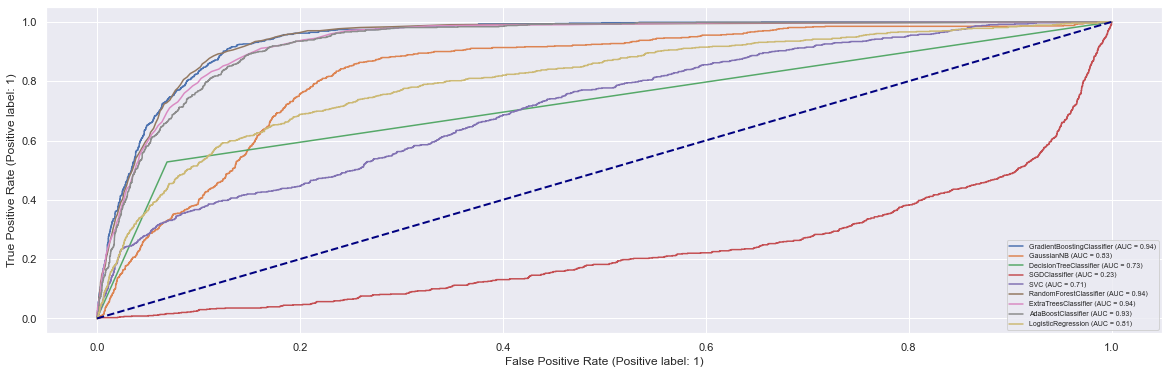

In [87]:
# AUC ROC Curve to compare the multiple models
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

#  Plot  AUC ROC curve for GradientBoostingClassifier
disp=plot_roc_curve(models[6][1],x_test,y_test)  

# Plot  AUC ROC curve for other models with same axis == GradientBoostingClassifier
plot_roc_curve(models[0][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[1][1],x_test,y_test,ax=disp.ax_) 
plot_roc_curve(models[2][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[3][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[4][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[5][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[7][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)

plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')

plt.legend(prop={'size':7},loc='lower right')
plt.show()

In [88]:
#Print Prediction for one input using GradientBoostingClassifier model
predict_this = [[26110,56,0,1,-1,0,1933,0,0,1,19,9,0.733333,2,-1,0,3]]

if models[6][1].predict(predict_this) == 1:
    print("This person will more likely subscribe to the term deposit.")
else:
    print("This person will not likely to subscribe to the term deposit.")

This person will not likely to subscribe to the term deposit.


# Saving the Model

In [89]:
import pickle
file = 'BankSubscribeDeposit'
#GradientBoosting Classfier
save = pickle.dump(models[6][1],open('BankSubscribeDeposit.pkl','wb'))


# Conclusion


In [90]:
#Encoding the Test Data
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

df_test=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv")

# encoding the categorical variables
encoder = preprocessing.LabelEncoder()
df_test['job'] = encoder.fit_transform(df_test['job'])
df_test['marital'] = encoder.fit_transform(df_test['marital'])
df_test['default'] = encoder.fit_transform(df_test['default'])
df_test['housing'] = encoder.fit_transform(df_test['housing'])
df_test['loan'] = encoder.fit_transform(df_test['loan'])
df_test['poutcome'] = encoder.fit_transform(df_test['poutcome'])
df_test['contact'] = encoder.fit_transform(df_test['contact'])
df_test['month'] = encoder.fit_transform(df_test['month'])
df_test


# encoding ordinal variables
education_encoder = OrdinalEncoder(categories = [['primary', 'secondary', 'tertiary']], handle_unknown="use_encoded_value", 
                                   unknown_value=-1, dtype = np.int64)
except_unknown_idx = list(df_test[df_test['education'] != 'unknown'].index)
unknown_idx = list(df_test[df_test['education'] == 'unknown'].index)

df_test.loc[except_unknown_idx, 'education'] = education_encoder.fit_transform(np.expand_dims(np.array(df_test['education'].iloc[except_unknown_idx]), axis=1))
df_test.loc[unknown_idx, 'education'] = education_encoder.transform(np.expand_dims(np.array(df_test['education'].iloc[unknown_idx]), axis=1))
df_test["education"].value_counts()
display(df_test)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,40403,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3
13560,11743,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,28292,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3
13562,45163,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2


In [91]:
#GradientBoostingClassifier model---Selected Best Model

pickl_BankSubscribeDeposit = pickle.load(open('BankSubscribeDeposit.pkl','rb'))
subscribed_test=pickl_BankSubscribeDeposit.predict(df_test)
df = pd.DataFrame(subscribed_test, columns =['testSubscribed_predicted'])
print("\nPredicted Subscribed list based on Test data provided: ")
display(df)



Predicted Subscribed list based on Test data provided: 


,testSubscribed_predicted
0,1
1,1
2,0
3,0
4,1
...,...
13559,0
13560,0
13561,0
13562,1
